In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import math
import numpy as np

#データをPandasのデータフレームに代入
data = pd.read_csv("sensor_data_200.txt",delimiter=" ",header=None,names=("data","time","ir","lidar"))

#平均値
mean = data["lidar"].mean()
#標本分散、不偏分散
zs = data["lidar"]
diff_square = [(z - mean)**2 for z in zs]  #リスト内包表記で記述。
#標本分散
sampling_var = sum(diff_square)/len(zs)
#不偏分散
unbiased_var = sum(diff_square)/(len(zs)-1)
#標本分散の標準偏差
sampling_stddev = math.sqrt(sampling_var)
#不偏分散の標準偏差
unbiased_stddev = math.sqrt(unbiased_var)


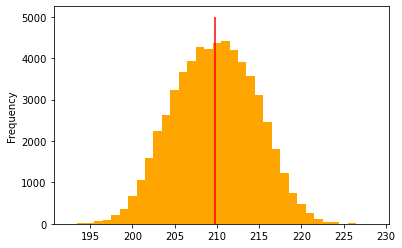

In [4]:
#ヒストグラム作成
bins_value = max(data["lidar"])-min(data["lidar"])
data["lidar"].plot(bins = bins_value, kind="hist", align="left", color="orange")
plt.vlines(mean, ymin=0, ymax=5000, color="red")
plt.show()

In [14]:
#頻度
freqs = pd.DataFrame(data["lidar"].value_counts()).sort_index()
#各測定値がでる確率
freqs["probes"] = freqs["lidar"]/len(data["lidar"])
#行と列の入れ替え
freqs.transpose()
print(type(freqs))

<class 'pandas.core.frame.DataFrame'>


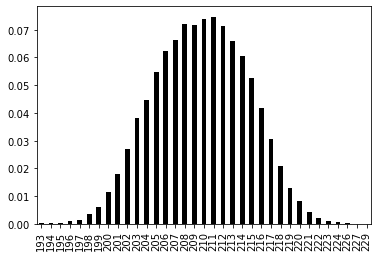

In [6]:
#確率質量関数
freqs["probes"].plot(kind="bar", color="Black")
plt.show()

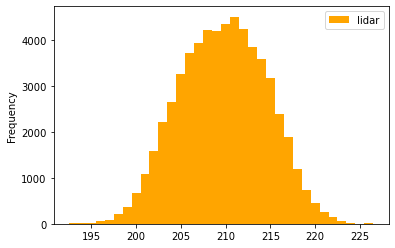

In [7]:
#Lidarでの測定をシミュレート
def drawing():
    return freqs.sample(n=1,weights="probes").index[0]

#samples = [drawing() for i in range(len(data))]
samples = [drawing() for i in range(len(data))]
simulated = pd.DataFrame(samples, columns=["lidar"])
simulated.transpose()

bins_value2 = max(simulated["lidar"])-min(simulated["lidar"])
simulated.plot(bins = bins_value2, kind="hist", align="left", color="orange")
plt.show()

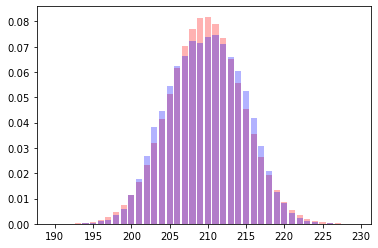

In [8]:
#正規分布、ガウス分布
def p(z, mu=209.7, dev=23.4):
    return math.exp(-(z-mu)**2/(2*dev))/(math.sqrt(2*math.pi*dev))

#台形公式
def prob(z,width = 0.5):
    return width*(p(z-width)+p(z+width))

#ガウス分布の数式でモデル化した分布とサンプリングして得られた分布とを比較
zs = range(190,230)
ys = [prob(z) for z in zs]
plt.bar(zs, ys, color="red", alpha=0.3)
f = freqs["probes"].sort_index()
plt.bar(f.index, f.values,color="blue", alpha=0.3)
plt.show()

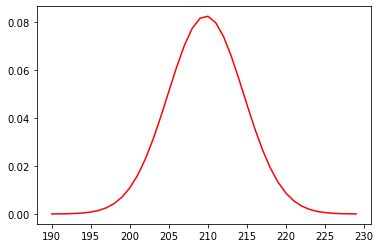

In [9]:
#確率密度関数（probability density function, pdf）をscipyの関数で出力
from scipy.stats import norm

zs = range(190,230)
ys = [norm.pdf(z,mean,sampling_stddev) for z in zs]
plt.plot(zs, ys, color="red")
plt.show()

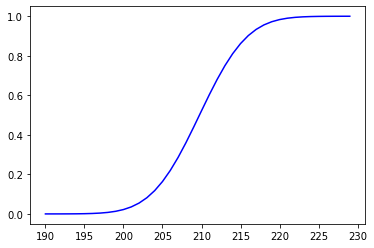

In [10]:
#累積分布関数
ys = [norm.cdf(z, mean, sampling_stddev) for z in zs]
plt.plot(zs, ys, color="blue")
plt.show()

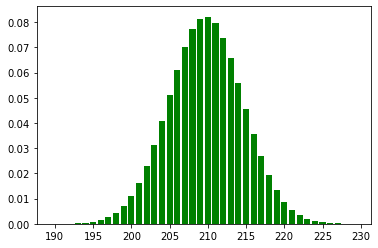

In [11]:
#台形公式ではなく累積分布関数から、確率質量関数を作成
ys = [norm.cdf(z+0.5, mean, sampling_stddev) - norm.cdf(z-0.5, mean, sampling_stddev) for z in zs]

plt.bar(zs, ys, color="green")
plt.show()